# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.0.1
Is using GPU? False


# Task 2: Preprocess Data

In [2]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


# Task 3: Visualize Examples

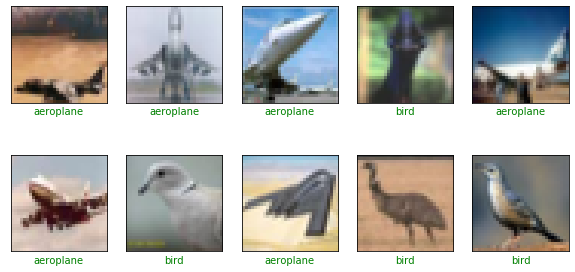

In [6]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color=col)
    plt.show()

show_random_examples(x_train, y_train, y_train)

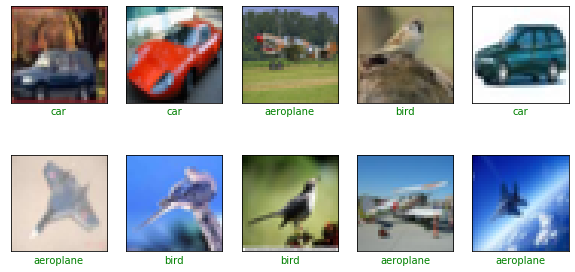

In [7]:
show_random_examples(x_test, y_test, y_test)

# Task 4: Create Model

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model
    
    model = tf.keras.Sequential()
    model.add(Input(shape=(32,32,3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)
    
    model.add(Flatten())
    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 15, 15, 64)       

# Task 5: Train the Model

In [12]:
h = model.fit(x_train/255., y_train, validation_data=(x_test/255., y_test), 
              epochs=10, batch_size=128,
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
              tf.keras.callbacks.ModelCheckpoint('models/model_(val_accuracy:.3f).h5',
              save_best_only=True, save_weights_only=False,
              monitor='val_accuracy')])



Train on 15000 samples, validate on 3000 samples
Epoch 1/10
15000/15000 [==============================] - 148s 10ms/sample - loss: 0.8908 - accuracy: 0.6764 - val_loss: 2.2477 - val_accuracy: 0.3333
Epoch 2/10
15000/15000 [==============================] - 140s 9ms/sample - loss: 0.5544 - accuracy: 0.7772 - val_loss: 1.7259 - val_accuracy: 0.4433
Epoch 3/10
15000/15000 [==============================] - 142s 9ms/sample - loss: 0.4941 - accuracy: 0.8004 - val_loss: 1.5942 - val_accuracy: 0.5597
Epoch 4/10
15000/15000 [==============================] - 138s 9ms/sample - loss: 0.4476 - accuracy: 0.8251 - val_loss: 0.8046 - val_accuracy: 0.6827
Epoch 5/10
15000/15000 [==============================] - 139s 9ms/sample - loss: 0.4187 - accuracy: 0.8385 - val_loss: 0.5640 - val_accuracy: 0.7890
Epoch 6/10
15000/15000 [==============================] - 139s 9ms/sample - loss: 0.3923 - accuracy: 0.8447 - val_loss: 0.5263 - val_accuracy: 0.8047
Epoch 7/10
15000/15000 [==========================

# Task 6: Final Predictions

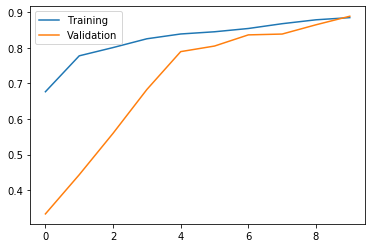

In [13]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs, label='Training')
plt.plot(range(len(accs)), val_accs, label='Validation')
plt.legend()
plt.show()

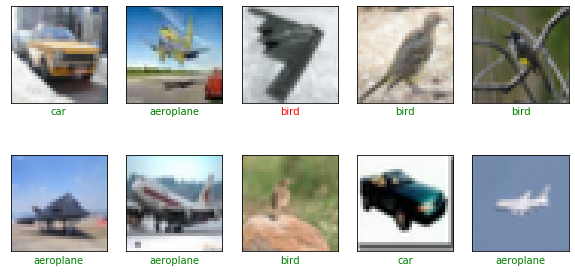

In [18]:
preds = model.predict(x_test/255.)
show_random_examples(x_test, y_test, preds)